<a href="https://colab.research.google.com/github/Abhilakshmi-v-s/ml_projects/blob/main/car_prize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('/content/autos.csv')
df

,index,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,...,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,...,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0.0,70435.0,2016-04-07 03:16:57
1,1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,...,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0.0,66954.0,2016-04-07 01:46:50
2,2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,...,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0.0,90480.0,2016-04-05 12:47:46
3,3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,...,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0.0,91074.0,2016-03-17 17:40:17
4,4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,...,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0.0,60437.0,2016-04-06 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5550,5550,2016-03-12 13:44:08,Volkswagen_Golf_Variant_1.9_TDI_Automatik,privat,Angebot,1150,control,kombi,2002,automatik,...,golf,150000,9,diesel,volkswagen,ja,2016-03-12 00:00:00,0.0,21765.0,2016-03-13 04:46:41
5551,5551,2016-03-26 17:54:51,Citroen_c3_kabrio_unfall,privat,Angebot,1400,control,cabrio,2006,manuell,...,c3,150000,6,benzin,citroen,NaN,2016-03-26 00:00:00,0.0,45279.0,2016-03-28 06:46:59
5552,5552,2016-03-26 16:48:48,Audi_A4_S4_1.6,privat,Angebot,1990,control,limousine,1998,automatik,...,a4,150000,6,benzin,audi,nein,2016-03-26 00:00:00,0.0,81735.0,2016-04-06 05:17:06
5553,5553,2016-03-20 12:40:35,Fiat_124_Spider_Pininfarina,privat,Angebot,16999,test,cabrio,1985,manuell,...,andere,150000,4,benzin,fiat,nein,2016-03-20 00:00:00,0.0,23827.0,2016-04-06 11:17:42


In [2]:
df.head()

,index,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,...,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,...,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0.0,70435.0,2016-04-07 03:16:57
1,1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,...,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0.0,66954.0,2016-04-07 01:46:50
2,2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,...,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0.0,90480.0,2016-04-05 12:47:46
3,3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,...,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0.0,91074.0,2016-03-17 17:40:17
4,4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,...,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0.0,60437.0,2016-04-06 10:17:21


In [3]:
df.tail()

,index,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,...,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
5550,5550,2016-03-12 13:44:08,Volkswagen_Golf_Variant_1.9_TDI_Automatik,privat,Angebot,1150,control,kombi,2002,automatik,...,golf,150000,9,diesel,volkswagen,ja,2016-03-12 00:00:00,0.0,21765.0,2016-03-13 04:46:41
5551,5551,2016-03-26 17:54:51,Citroen_c3_kabrio_unfall,privat,Angebot,1400,control,cabrio,2006,manuell,...,c3,150000,6,benzin,citroen,NaN,2016-03-26 00:00:00,0.0,45279.0,2016-03-28 06:46:59
5552,5552,2016-03-26 16:48:48,Audi_A4_S4_1.6,privat,Angebot,1990,control,limousine,1998,automatik,...,a4,150000,6,benzin,audi,nein,2016-03-26 00:00:00,0.0,81735.0,2016-04-06 05:17:06
5553,5553,2016-03-20 12:40:35,Fiat_124_Spider_Pininfarina,privat,Angebot,16999,test,cabrio,1985,manuell,...,andere,150000,4,benzin,fiat,nein,2016-03-20 00:00:00,0.0,23827.0,2016-04-06 11:17:42
5554,5554,2016-03-22 15:25:35,Mercedes_Benz_C_180_T_Esprit,privat,Angebot,1390,test,kombi,1998,automatik,...,c_klasse,150000,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5555 entries, 0 to 5554
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                5555 non-null   int64  
 1   dateCrawled          5555 non-null   object 
 2   name                 5555 non-null   object 
 3   seller               5555 non-null   object 
 4   offerType            5555 non-null   object 
 5   price                5555 non-null   int64  
 6   abtest               5555 non-null   object 
 7   vehicleType          4935 non-null   object 
 8   yearOfRegistration   5555 non-null   int64  
 9   gearbox              5242 non-null   object 
 10  powerPS              5555 non-null   int64  
 11  model                5272 non-null   object 
 12  kilometer            5555 non-null   int64  
 13  monthOfRegistration  5555 non-null   int64  
 14  fuelType             5016 non-null   object 
 15  brand                5554 non-null   o

In [5]:
df.drop_duplicates()

,index,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,...,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,...,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0.0,70435.0,2016-04-07 03:16:57
1,1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,...,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0.0,66954.0,2016-04-07 01:46:50
2,2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,...,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0.0,90480.0,2016-04-05 12:47:46
3,3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,...,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0.0,91074.0,2016-03-17 17:40:17
4,4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,...,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0.0,60437.0,2016-04-06 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5550,5550,2016-03-12 13:44:08,Volkswagen_Golf_Variant_1.9_TDI_Automatik,privat,Angebot,1150,control,kombi,2002,automatik,...,golf,150000,9,diesel,volkswagen,ja,2016-03-12 00:00:00,0.0,21765.0,2016-03-13 04:46:41
5551,5551,2016-03-26 17:54:51,Citroen_c3_kabrio_unfall,privat,Angebot,1400,control,cabrio,2006,manuell,...,c3,150000,6,benzin,citroen,NaN,2016-03-26 00:00:00,0.0,45279.0,2016-03-28 06:46:59
5552,5552,2016-03-26 16:48:48,Audi_A4_S4_1.6,privat,Angebot,1990,control,limousine,1998,automatik,...,a4,150000,6,benzin,audi,nein,2016-03-26 00:00:00,0.0,81735.0,2016-04-06 05:17:06
5553,5553,2016-03-20 12:40:35,Fiat_124_Spider_Pininfarina,privat,Angebot,16999,test,cabrio,1985,manuell,...,andere,150000,4,benzin,fiat,nein,2016-03-20 00:00:00,0.0,23827.0,2016-04-06 11:17:42


In [6]:
df.shape

(5555, 21)

In [7]:
df.dtypes

index                    int64
dateCrawled             object
name                    object
seller                  object
offerType               object
price                    int64
abtest                  object
vehicleType             object
yearOfRegistration       int64
gearbox                 object
powerPS                  int64
model                   object
kilometer                int64
monthOfRegistration      int64
fuelType                object
brand                   object
notRepairedDamage       object
dateCreated             object
nrOfPictures           float64
postalCode             float64
lastSeen                object
dtype: object

In [8]:
df.isna().sum()

index                     0
dateCrawled               0
name                      0
seller                    0
offerType                 0
price                     0
abtest                    0
vehicleType             620
yearOfRegistration        0
gearbox                 313
powerPS                   0
model                   283
kilometer                 0
monthOfRegistration       0
fuelType                539
brand                     1
notRepairedDamage      1099
dateCreated               1
nrOfPictures              1
postalCode                1
lastSeen                  1
dtype: int64

In [9]:
for i in df.columns:
  print('unique_value_count =',df[i].nunique())
  print('value_counts','\n',df[i].value_counts(),'\n',"*"*100)

unique_value_count = 5555
value_counts 
 0       1
3700    1
3708    1
3707    1
3706    1
       ..
1850    1
1849    1
1848    1
1847    1
5554    1
Name: index, Length: 5555, dtype: int64 
 ****************************************************************************************************
unique_value_count = 5521
value_counts 
 2016-03-24 00:56:15    2
2016-03-05 16:45:59    2
2016-04-01 07:55:36    2
2016-04-01 14:59:23    2
2016-03-21 20:50:20    2
                      ..
2016-03-15 19:58:20    1
2016-04-06 21:25:18    1
2016-03-14 22:37:39    1
2016-03-12 13:42:49    1
2016-03-22 15:25:35    1
Name: dateCrawled, Length: 5521, dtype: int64 
 ****************************************************************************************************
unique_value_count = 5092
value_counts 
 Ford_Fiesta                                    16
BMW_316i                                       10
BMW_320i                                        9
Renault_Twingo                                  8


In [10]:
drop=['nrOfPictures','name']
df1 = df.drop(drop,axis=1)

In [11]:
df1.shape

(5555, 19)

<Axes: xlabel='price', ylabel='count'>

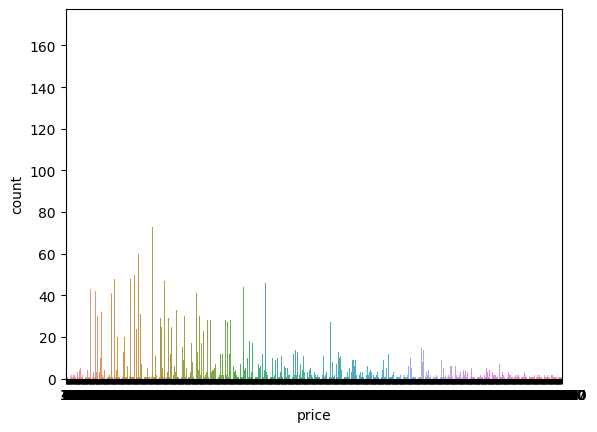

In [12]:
sns.countplot(x='price',data=df1)

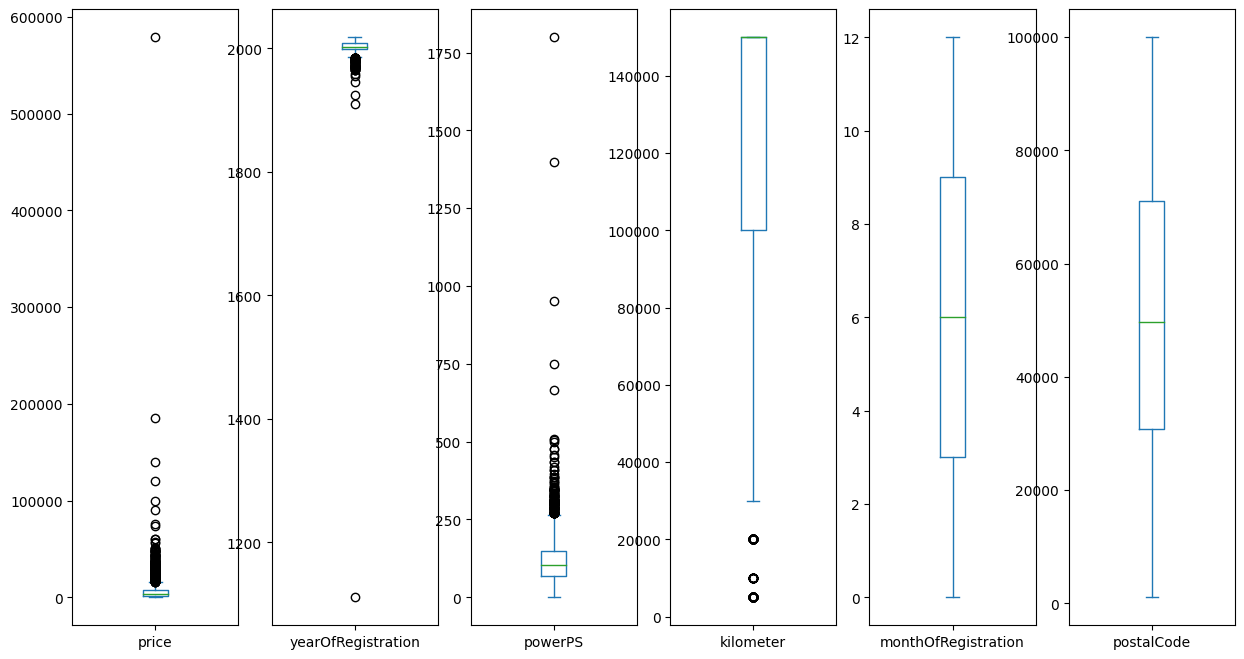

In [13]:
col =['price','yearOfRegistration','powerPS','kilometer','monthOfRegistration','postalCode']
df[col].plot(kind='box',subplots=True,figsize=(15,8))
plt.show()

<ipython-input-14-b8f4f3434b6f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df1.corr(),annot=True)


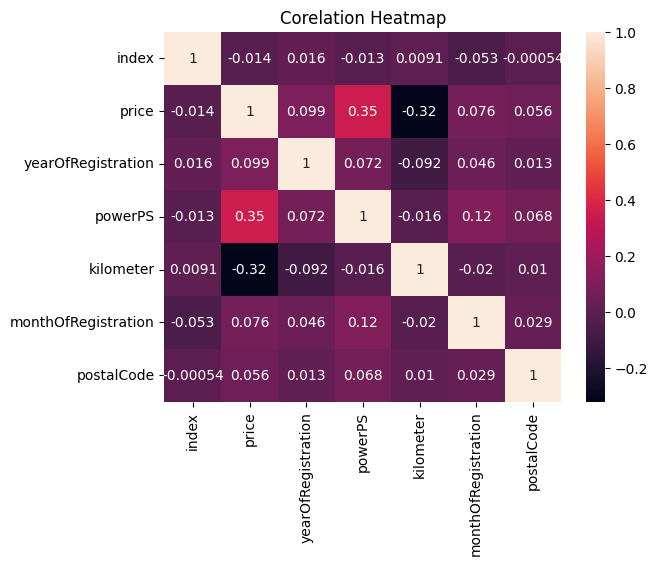

In [14]:
sns.heatmap(df1.corr(),annot=True)
plt.title('Corelation Heatmap')
plt.show()

In [15]:
df1.dropna(inplace=True)

In [16]:
df1.isna().sum()

index                  0
dateCrawled            0
seller                 0
offerType              0
price                  0
abtest                 0
vehicleType            0
yearOfRegistration     0
gearbox                0
powerPS                0
model                  0
kilometer              0
monthOfRegistration    0
fuelType               0
brand                  0
notRepairedDamage      0
dateCreated            0
postalCode             0
lastSeen               0
dtype: int64

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'index'),
  Text(1, 0, 'price'),
  Text(2, 0, 'yearOfRegistration'),
  Text(3, 0, 'powerPS'),
  Text(4, 0, 'kilometer'),
  Text(5, 0, 'monthOfRegistration'),
  Text(6, 0, 'postalCode')])

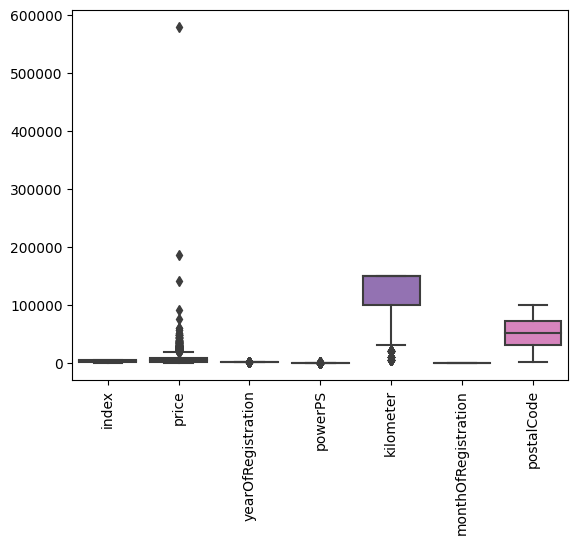

In [17]:
sns.boxplot(df1)
plt.xticks(rotation=90)

In [18]:

rmve_outliers = ['price','yearOfRegistration','powerPS','kilometer','postalCode','monthOfRegistration']

for column in rmve_outliers:
    q1 = df1[column].quantile(0.25)
    q2 = df1[column].quantile(0.75)
    IQR = q2 - q1
    upper_bound = q2 + (1.5 * IQR)
    lower_bound = q1 - (1.5 * IQR)
    outlier_mask = (df1[column] < lower_bound) | (df1[column] > upper_bound)

    df1 = df1[~outlier_mask]

In [19]:
df1.shape

(2951, 19)

In [20]:
df1.dtypes

index                    int64
dateCrawled             object
seller                  object
offerType               object
price                    int64
abtest                  object
vehicleType             object
yearOfRegistration       int64
gearbox                 object
powerPS                  int64
model                   object
kilometer                int64
monthOfRegistration      int64
fuelType                object
brand                   object
notRepairedDamage       object
dateCreated             object
postalCode             float64
lastSeen                object
dtype: object

In [21]:
#labelencoding col salary
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
categorical_columns = ['dateCrawled','seller','offerType','abtest','vehicleType','gearbox','model','fuelType','brand','notRepairedDamage','dateCreated','lastSeen']
for column in categorical_columns:
    df1[column]=le.fit_transform(df1[column])



In [22]:
df1

,index,dateCrawled,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
3,3,1043,0,0,1500,1,4,2001,1,75,93,150000,6,1,37,1,21,91074.0,398
4,4,2342,0,0,3600,1,4,2008,1,69,80,90000,7,3,31,1,35,60437.0,2193
5,5,2828,0,0,650,1,6,1995,1,102,9,150000,10,1,2,0,39,33775.0,2410
6,6,2487,0,0,2200,1,2,2004,1,109,6,150000,8,1,25,1,36,67112.0,1766
10,10,1877,0,0,2000,0,6,2004,1,105,8,150000,12,1,19,1,30,96224.0,2201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5547,5547,2636,0,0,2300,1,6,1997,1,150,22,150000,2,1,1,1,37,97215.0,2606
5548,5548,2469,0,0,790,0,4,1997,1,60,133,150000,6,1,37,1,36,45473.0,1433
5549,5549,1190,0,0,9990,1,5,2007,1,170,125,150000,7,3,31,1,23,40468.0,2604
5550,5550,630,0,0,1150,0,5,2002,0,131,93,150000,9,3,37,0,16,21765.0,226


In [23]:
df1.isna().sum()

index                  0
dateCrawled            0
seller                 0
offerType              0
price                  0
abtest                 0
vehicleType            0
yearOfRegistration     0
gearbox                0
powerPS                0
model                  0
kilometer              0
monthOfRegistration    0
fuelType               0
brand                  0
notRepairedDamage      0
dateCreated            0
postalCode             0
lastSeen               0
dtype: int64

In [24]:
df1.dtypes

index                    int64
dateCrawled              int64
seller                   int64
offerType                int64
price                    int64
abtest                   int64
vehicleType              int64
yearOfRegistration       int64
gearbox                  int64
powerPS                  int64
model                    int64
kilometer                int64
monthOfRegistration      int64
fuelType                 int64
brand                    int64
notRepairedDamage        int64
dateCreated              int64
postalCode             float64
lastSeen                 int64
dtype: object

In [25]:
df2 = df1.drop('index',axis=1)

In [26]:

x=df2.drop('price',axis=1)
y=df2['price']


In [27]:
from sklearn.feature_selection import SelectKBest,f_regression
k=14
selector=SelectKBest(score_func=f_regression,k=k)
best = selector.fit_transform(x, y)

select_features=selector.get_support(indices=True)
print("selected features:",df1.columns[select_features].tolist())

selected features: ['index', 'price', 'abtest', 'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model', 'kilometer', 'monthOfRegistration', 'fuelType', 'brand', 'notRepairedDamage', 'dateCreated']


In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=42)
x_train

,dateCrawled,seller,offerType,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
4968,1071,0,0,0,6,2007,1,102,93,150000,2,1,37,1,21,26810.0,1406
3624,932,0,0,1,5,2002,0,163,13,150000,0,3,2,1,20,33330.0,371
1521,2223,0,0,0,4,2000,1,50,81,90000,4,1,10,1,34,40589.0,2666
2028,384,0,0,1,6,1992,0,0,32,150000,7,1,20,1,13,74395.0,433
1752,1381,0,0,1,7,2007,1,150,69,150000,2,1,11,1,25,55469.0,1761
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3062,1935,0,0,0,5,1997,0,165,22,150000,8,1,1,1,31,35457.0,1814
2077,2426,0,0,1,2,2008,1,105,21,150000,4,3,1,1,36,22083.0,2819
2150,1719,0,0,0,6,1999,1,80,32,100000,3,1,9,1,28,20357.0,2075
2431,790,0,0,1,6,1996,1,90,93,150000,9,1,37,1,18,35576.0,293


In [29]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [30]:
import warnings
warnings.filterwarnings('ignore')

In [31]:
from sklearn.model_selection import GridSearchCV
param={'copy_X':[True,False], 'fit_intercept':[True,False], 'n_jobs':[None,1,5,7,6], 'positive':[True,False]}
gsv=GridSearchCV(model,param,cv=10,scoring='accuracy')
gsv.fit(x_train,y_train)
gsv.best_params_

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': True}

In [32]:
model1=LinearRegression(positive=True)
model1.fit(x_train,y_train)
y_pred=model1.predict(x_test)

In [33]:
dfe=pd.DataFrame({'actual':y_test,'predicted':y_pred,'difference':y_test-y_pred})
dfe

,actual,predicted,difference
1525,4900,4275.442238,624.557762
488,10550,7613.208977,2936.791023
5113,1199,2788.131035,-1589.131035
4651,9250,8355.534360,894.465640
5349,1899,2043.083481,-144.083481
...,...,...,...
2714,7500,7941.512820,-441.512820
4368,2500,6403.939879,-3903.939879
2004,5490,6767.429490,-1277.429490
3237,1000,2394.029330,-1394.029330


In [34]:
print('slope is')
print(list(zip(x,model1.coef_)))

slope is
[('dateCrawled', 0.0), ('seller', 0.0), ('offerType', 0.0), ('abtest', 168.64227207855959), ('vehicleType', 0.0), ('yearOfRegistration', 427.3734915871176), ('gearbox', 0.0), ('powerPS', 28.361200403619442), ('model', 1.5821242851544095), ('kilometer', 0.0), ('monthOfRegistration', 0.0), ('fuelType', 273.7878275026431), ('brand', 0.0), ('notRepairedDamage', 1300.5465380983558), ('dateCreated', 0.0), ('postalCode', 0.0), ('lastSeen', 0.437616701662063)]


In [35]:
print('constant is',model1.intercept_)

constant is -857314.4993446035


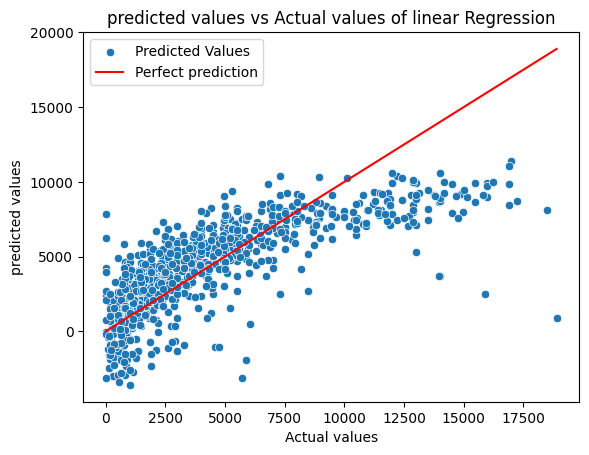

In [36]:
sns.scatterplot(x=y_test,y=y_pred,label='Predicted Values')
plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)],color='red',label='Perfect prediction')
plt.xlabel('Actual values')
plt.ylabel('predicted values')
plt.title('predicted values vs Actual values of linear Regression')
plt.legend()
plt.show()

In [37]:
from sklearn.metrics import mean_absolute_percentage_error,r2_score
print('Error percentage is',mean_absolute_percentage_error(y_test,y_pred))
print('r2_score',r2_score(y_test,y_pred))

Error percentage is 1.7111219464666115e+17
r2_score 0.5846935457320867


In [42]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
tree=DecisionTreeRegressor()
param_grid={
            'max_depth':[2,4,6,8],
            'min_samples_split':[2,4,6,8],
            'min_samples_leaf':[1,2.3,4],
            'max_features':['auto','sqrt','log2']
            }
grid_search=GridSearchCV(estimator=tree,param_grid=param_grid,cv=5,scoring='neg_mean_squared_error',n_jobs=-1)
grid_search.fit(x_train,y_train)
best_params=grid_search.best_params_

print(best_params)


{'max_depth': 6, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 4}


In [48]:
tree=DecisionTreeRegressor(max_depth=8, max_features='auto', min_samples_leaf=4, min_samples_split=8)
tree.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=8, max_features='auto', min_samples_leaf=4,
                      min_samples_split=8)

In [49]:
y_pred1=tree.predict(x_test)
print('Error percentage is',mean_absolute_percentage_error(y_test,y_pred))
print('r2_score',r2_score(y_test,y_pred))


Error percentage is 1.7111219464666115e+17
r2_score 0.5846935457320867
